<a href="https://colab.research.google.com/github/carlamaziero/Reconhecimento_padroes/blob/main/Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns  # visualization tool
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno
sns.set()

[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]

In [68]:
!unzip -n titanic.zip -d titanic

for dirname, _, filenames in os.walk('./titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Archive:  titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       
./titanic/train.csv
./titanic/test.csv
./titanic/gender_submission.csv


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
train_data = pd.read_csv('titanic/train.csv')
num_linhas = 15
train_data.head(num_linhas)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [71]:
# Explorando os dados de teste 
# Lembrando que os dados de teste de kaggle não possuem o atributo Survival (label para o problema de classificação)
test_data = pd.read_csv("./titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
# Explorano os dados de submisão para kaggle
gender_submission = pd.read_csv('./titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


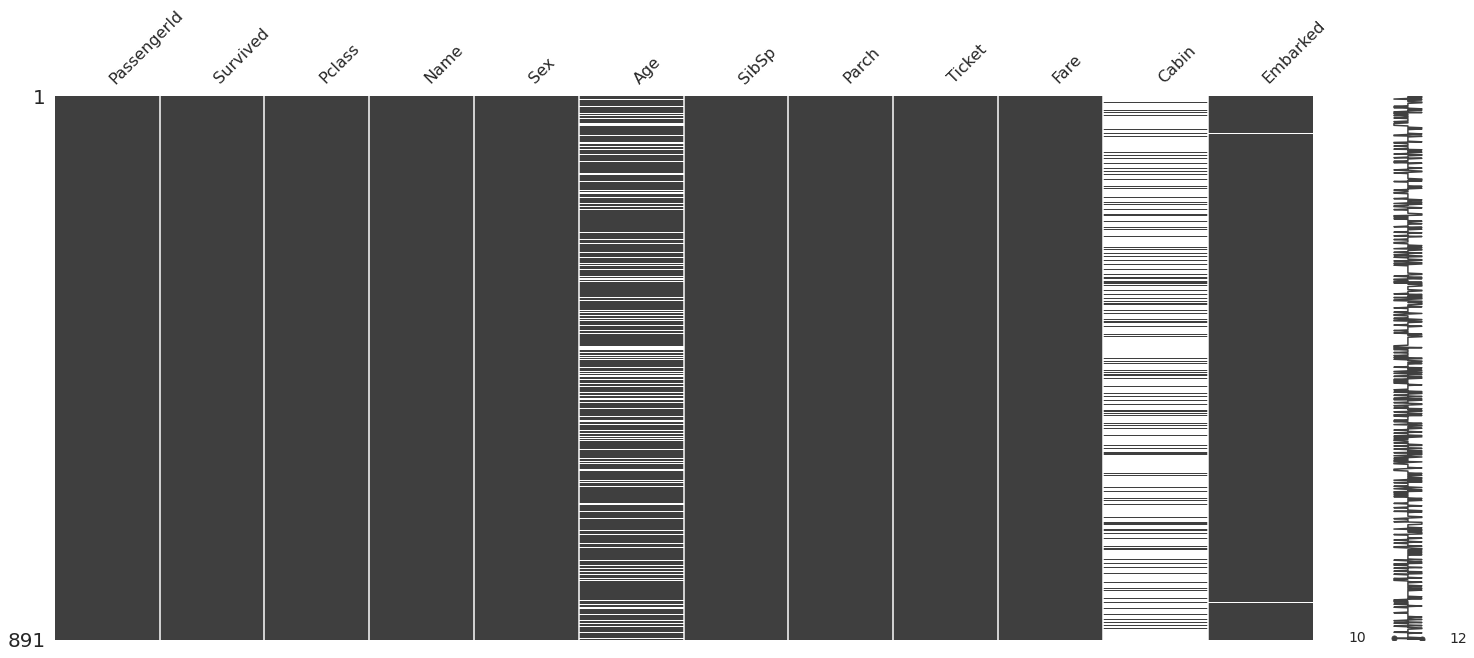

In [74]:
msno.matrix(train_data)

plt.show()

In [75]:
train_age = train_data['Age'].copy()
train_age = train_age[~train_data['Age'].isnull()] 


print(train_age.describe())


age_media =  int(train_age.mean())

print("\nA idade media do Titanic foi de: {} anos".format(age_media))

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

A idade media do Titanic foi de: 29 anos


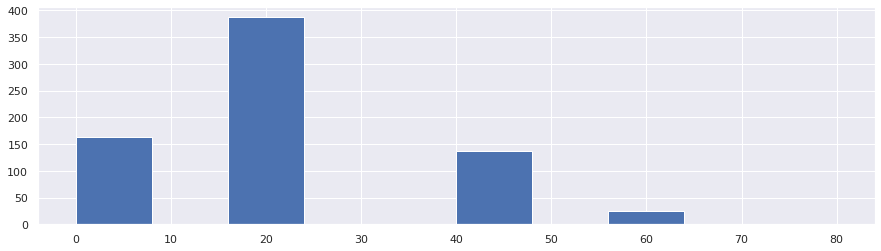

In [76]:
# Quantification Xage
# Xage = [Xage/q] * q 
quant = 20
train_age = ((train_age/quant).astype(int)) * quant
train_age.hist()
plt.show()

In [77]:
train_surv = train_data['Survived'].copy()
train_surv = train_surv[~train_data['Age'].isnull()]

age_surv = []
for age in train_age.sort_values(ascending=True).unique():
  age_surv.append(sum(train_surv[train_age==age]))
  print('Edad: ', age, '\t Probabilidade de sobreviver: ', sum(train_surv[train_age==age])/len(train_surv[train_age==age]) )

age_surv = pd.DataFrame( data=age_surv )[0]

Edad:  0 	 Probabilidade de sobreviver:  0.4817073170731707
Edad:  20 	 Probabilidade de sobreviver:  0.3875968992248062
Edad:  40 	 Probabilidade de sobreviver:  0.39416058394160586
Edad:  60 	 Probabilidade de sobreviver:  0.24
Edad:  80 	 Probabilidade de sobreviver:  1.0


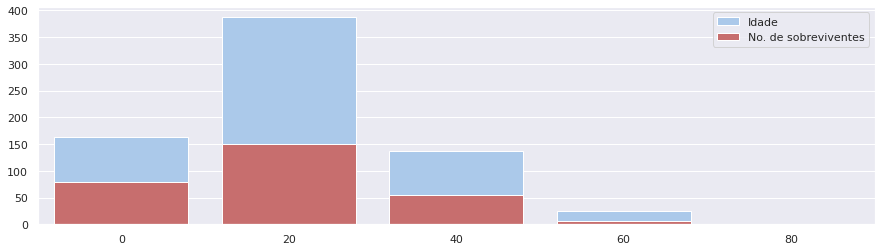

In [78]:
age = train_age.value_counts().sort_index()
sns.set_color_codes("pastel")
g=sns.barplot(x=age.index.values, y=age.values, order=age.index, color="b", label='Idade')
sns.set_color_codes("muted")
sns.barplot(x=age.index.values, y=age_surv.values, order=age.index, color="r", label='No. de sobreviventes')
plt.legend(loc=1)
plt.show()

In [79]:
age_afetada =  "60-80"
age_meninos =  "Sim"

print("A faixa etária mais afetada foi: {}".format(age_afetada))
print("Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate? {}".format(age_meninos))

A faixa etária mais afetada foi: 60-80
Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate? Sim


In [80]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Probabilidade de sobreviver das mulheres:", rate_women)

Probabilidade de sobreviver das mulheres: 0.7420382165605095


In [81]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Probabilidade de sobreviver dos homes:", rate_men)

Probabilidade de sobreviver dos homes: 0.18890814558058924


In [82]:
sex_sobreviveu = "Mulheres."

print("Quem sobreviveu mais no acidente, mulheres ou homens? {}".format(sex_sobreviveu))

Quem sobreviveu mais no acidente, mulheres ou homens? Mulheres.


In [83]:
class layer(object):
    
    def forward(self, param):
        raise NotImplementedError

    def backward(self, param):
        raise NotImplementedError

In [84]:
class inner(layer):

   
    def forward(self, param): 
        return np.dot(param['w'],param['x']) 
    
    def backward(self, param):
        return np.dot(param['w'].T, param['dzdx']), np.dot(param['dzdx'],param['x'].T)

Camada Sigm

In [85]:
class sigm(layer):
    
    def forward(self, param): 
        return self._sigm(param['x'])

    def backward(self, param):
        return self._sigm(param['x'])*(1.0-self._sigm(param['x']))*param['dzdx']

    def _sigm(self, x): 
      
      sig = 1/(1 + np.exp(-x))
    
      return sig

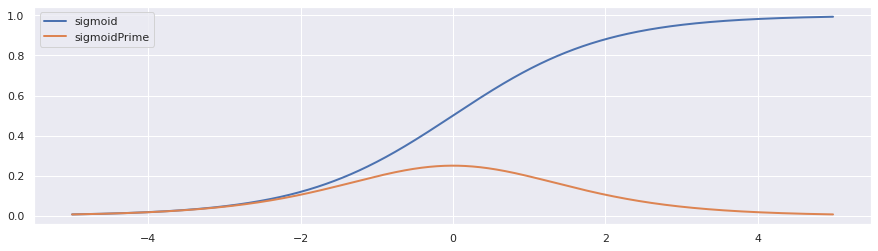

In [86]:
x = np.arange(-5,5,0.01)
plt.plot(x, sigm().forward({'x':x}), linewidth=2)
plt.plot(x, sigm().backward({'x':x, 'dzdx':1}), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

In [87]:
class loss(layer):
    
    def forward(self, param):         
        return  (1.0/(2.0*len(param['y']))*np.sum((param['y']-param['x'])**2))

    def backward(self, param):
        return (param['x']-param['y'])*param['dzdx']

In [88]:
def Net( x, w1, w2):
    '''
    forward function
    Input:
        * x vector nxm. m featurs
        * w1, w2 weigths
    Return:
        * z4
    Note: b=0
    '''
    z1 = x
    z2 = inner().forward({'x':z1, 'w':w1}) 
    z3 = inner().forward({'x':z2, 'w':w2}) 
    z4 = sigm().forward({'x':z3})
    return z4

In [90]:
def costFunc( x, y, w1, w2):
    '''
    forward function
    Input:
        * x vector nxm. m featurs
        * w1, w2 weigths
    Return:
        * z5
    
    Note: b=0
    '''

    z1 = x
    z2 = inner().forward({'x':z1, 'w':w1}) 
    z3 = inner().forward({'x':z2, 'w':w2}) 
    z4 = sigm().forward({'x':z3})
    z5 = loss().forward({'x':z4, 'y':y})

    return z5

# Gradient function
def gradCostFunc(x, y, w1, w2):
    '''
    Apply backward function
    Compute dervative with respect to w1 and w2
    '''
    
    # forward --->
    z1 = x
    z2 = inner().forward({'x':z1, 'w':w1}) 
    z3 = inner().forward({'x':z2, 'w':w2}) 
    z4 = sigm().forward({'x':z3});
    z5 = loss().forward({'x':z4, 'y':y})

    E = z5

    # <--- backward
    l5 = 1
    l4 = loss().backward({'x':z4, 'y':y, 'dzdx':l5} )  
    l3 = sigm().backward({'x':z3, 'dzdx':l4})
    l2, dEdW2 = inner().backward({'x':z2, 'w':w2, 'dzdx':l3})
    _ , dEdW1 = inner().backward({'x':z1, 'w':w1, 'dzdx':l2})

    return E, dEdW1, dEdW2

Test

In [91]:
# Create synthetic data

# data
x = np.matrix([[1,2,3]], dtype=np.float64).T
y = np.matrix([1.0], dtype=np.float64)

# init weights
w1 = np.matrix([[0.1, 0.2, 0.3],[0.1, 0.2, 0.3]], dtype=np.float64)
w2 = np.matrix([0.8, 0.2], dtype=np.float64)

# evaluate function
y_ = Net( x, w1, w2)
e = loss().forward({'x':y_,'y':y})

print('Loss:', e)

Loss: 0.019565606972901814


In [92]:
# derivate
# grad J(x)
E, dEdW1, dEdW2 = gradCostFunc(x, y, w1, w2);

# minimization with gradien decent
# w^t = m*w^(t-1) + lr*gardJ  

print(E)
print(dEdW1)
print(dEdW2)

0.019565606972901814
[[-0.02511234 -0.05022469 -0.07533703]
 [-0.00627809 -0.01255617 -0.01883426]]
[[-0.0439466 -0.0439466]]


In [93]:
import random
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression


y = train_data['Survived']

train_data['SibSp'].fillna(method='ffill', inplace=True)
train_data['Sex'].fillna(method='ffill', inplace=True)
train_data['Pclass'].fillna(method='ffill', inplace=True)
train_data['Parch'].fillna(method='ffill', inplace=True)
features = ['Sex', 'SibSp', 'Pclass', 'Parch']

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

tamanho_val = 0.25

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)


model = LogisticRegression()



model.fit(X_train, y_train)



preditions = model.predict(X_val)



acc = metrics.accuracy_score(y_val, preditions)

print('Accuracy', acc)

Accuracy 0.7892376681614349


In [94]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [95]:
predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
